In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [12]:
# Create the Blackjack environment
env = gym.make('Blackjack-v1', natural=False, sab=False)

def policy(state):
    """Fixed policy: Stick if sum >= 18, otherwise hit."""
    player_sum, _, _ = state
    return 0 if player_sum >= 18 else 1  # 0 = stick, 1 = hit

In [13]:
def monte_carlo_policy_evaluation(policy, env, num_episodes=500000, gamma=1.0):
    """First-visit Monte Carlo policy evaluation."""
    returns = defaultdict(list)
    V = defaultdict(float)

    for _ in range(num_episodes):
        state = env.reset()
        episode = []
        done = False

        while not done:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)  # Changed line
            episode.append((state, reward))
            state = next_state

        G = 0  # Return
        visited_states = set()
        for t in reversed(range(len(episode))):
            state, reward = episode[t]
            G = gamma * G + reward
            if state not in visited_states:
                returns[state].append(G)
                V[state] = np.mean(returns[state])
                visited_states.add(state)

    return V

In [14]:
# Run Monte Carlo evaluation
V = monte_carlo_policy_evaluation(policy, env)

# Extract values for heatmap visualization
player_sums = np.arange(12, 22)
dealer_shows = np.arange(1, 11)
V_matrix = np.zeros((len(player_sums), len(dealer_shows)))

for i, player in enumerate(player_sums):
    for j, dealer in enumerate(dealer_shows):
        V_matrix[i, j] = V.get((player, dealer, False), 0)  # Usable ace = False


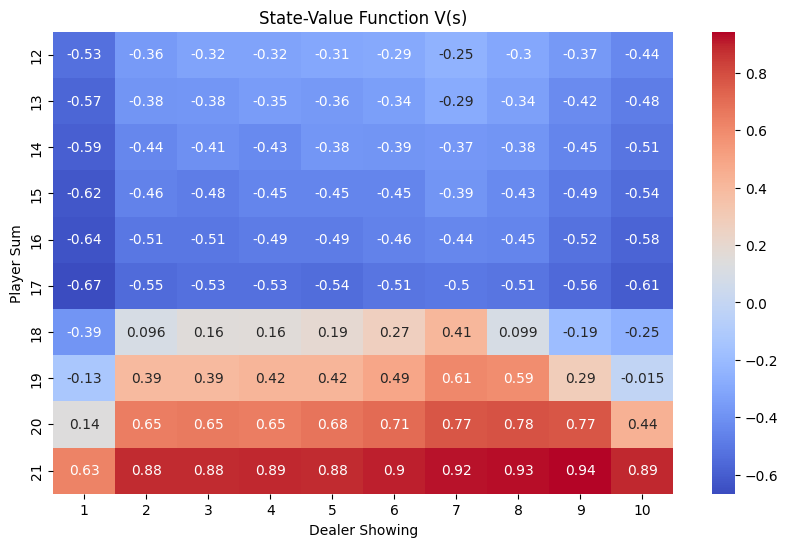

In [15]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(V_matrix, annot=True, xticklabels=dealer_shows, yticklabels=player_sums, cmap='coolwarm')
plt.xlabel('Dealer Showing')
plt.ylabel('Player Sum')
plt.title('State-Value Function V(s)')
plt.show()



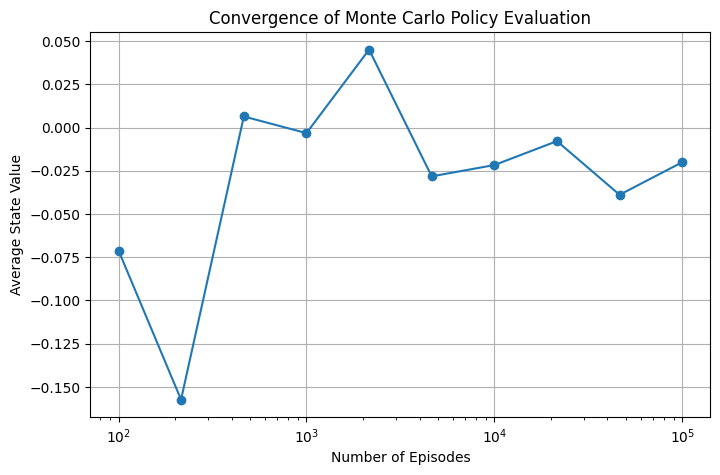

In [16]:
# Convergence plot
num_episodes = np.logspace(2, 5, num=10, dtype=int)
values_over_time = []

for episodes in num_episodes:
    V_temp = monte_carlo_policy_evaluation(policy, env, num_episodes=episodes)
    values_over_time.append(np.mean(list(V_temp.values())))

plt.figure(figsize=(8, 5))
plt.plot(num_episodes, values_over_time, marker='o')
plt.xscale('log')
plt.xlabel('Number of Episodes')
plt.ylabel('Average State Value')
plt.title('Convergence of Monte Carlo Policy Evaluation')
plt.grid()
plt.show()